Present a flexible solution to calculate, plot and compare different similarity measures.

<h2>Import packages and data</h2>

In [1]:
from scipy.io import netcdf
import similarity_measures as sim
import calculations as calc
import plots
import numpy as np

In [2]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Derive QBO</h2>

In [3]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

<h2>Calculate, plot and compare different similarity measures</h2>

In [4]:
print(plots.plot_similarities.__doc__)


    Plot the similarity of a reference data series and all points on the map regarding different
    similarity measures

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        metrics (list): List with similarity metrics to compute similarity between two time series
        level (int, optional): Level on which the similarity should be calculated
            Defaults to 0
        mode (str, optional): Mode of visualization
            Options: "whole_period": Similarity over whole period
                     "whole_period_per_month": Similarity over whole period, every month seperately
                     "whole_period_winter_only": Similarity over whole period, only winter months
            Defaults to "whole_period"
    


<h3>We want to compare Mutual Information with Transfer Entropy and Cosine Similarity</h3>

In [5]:
metrics = [sim.mutual_information, sim.transfer_entropy, sim.cosine_similarity]

<h2>1. Visualization: Whole period</h2>

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:63: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[i])


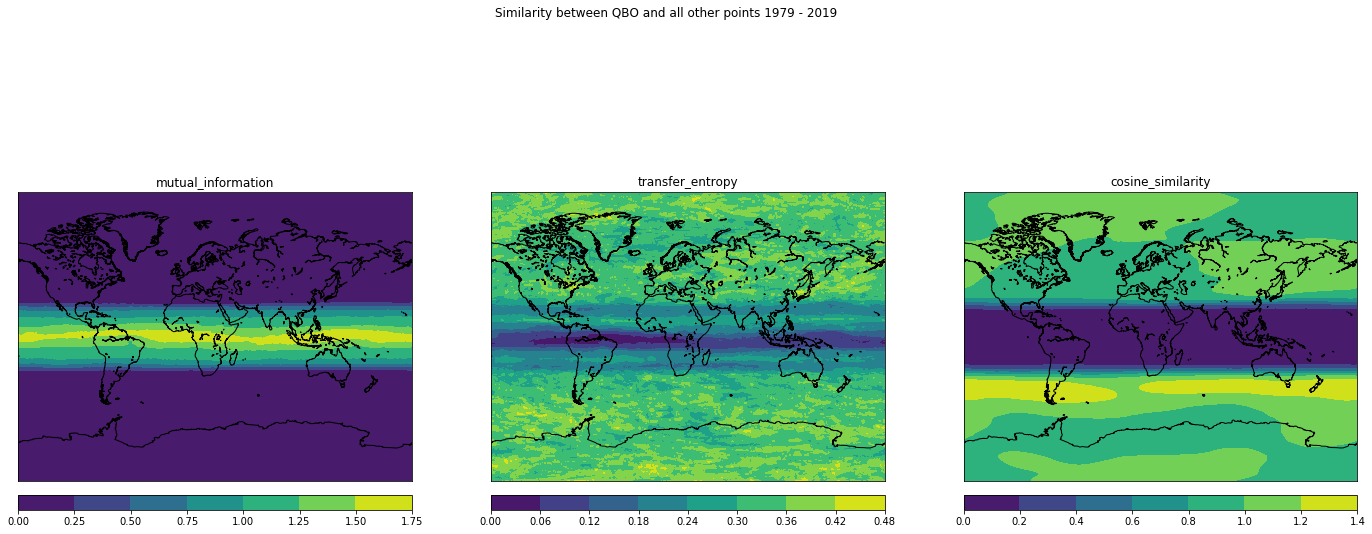

In [6]:
plots.plot_similarities(np.array(u_l30[:, :, :, :]), np.array(qbo_equator), metrics, mode="whole_period")

<h2>2. Visualization: Whole period, every month seperately</h2>

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:112: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[month][i])


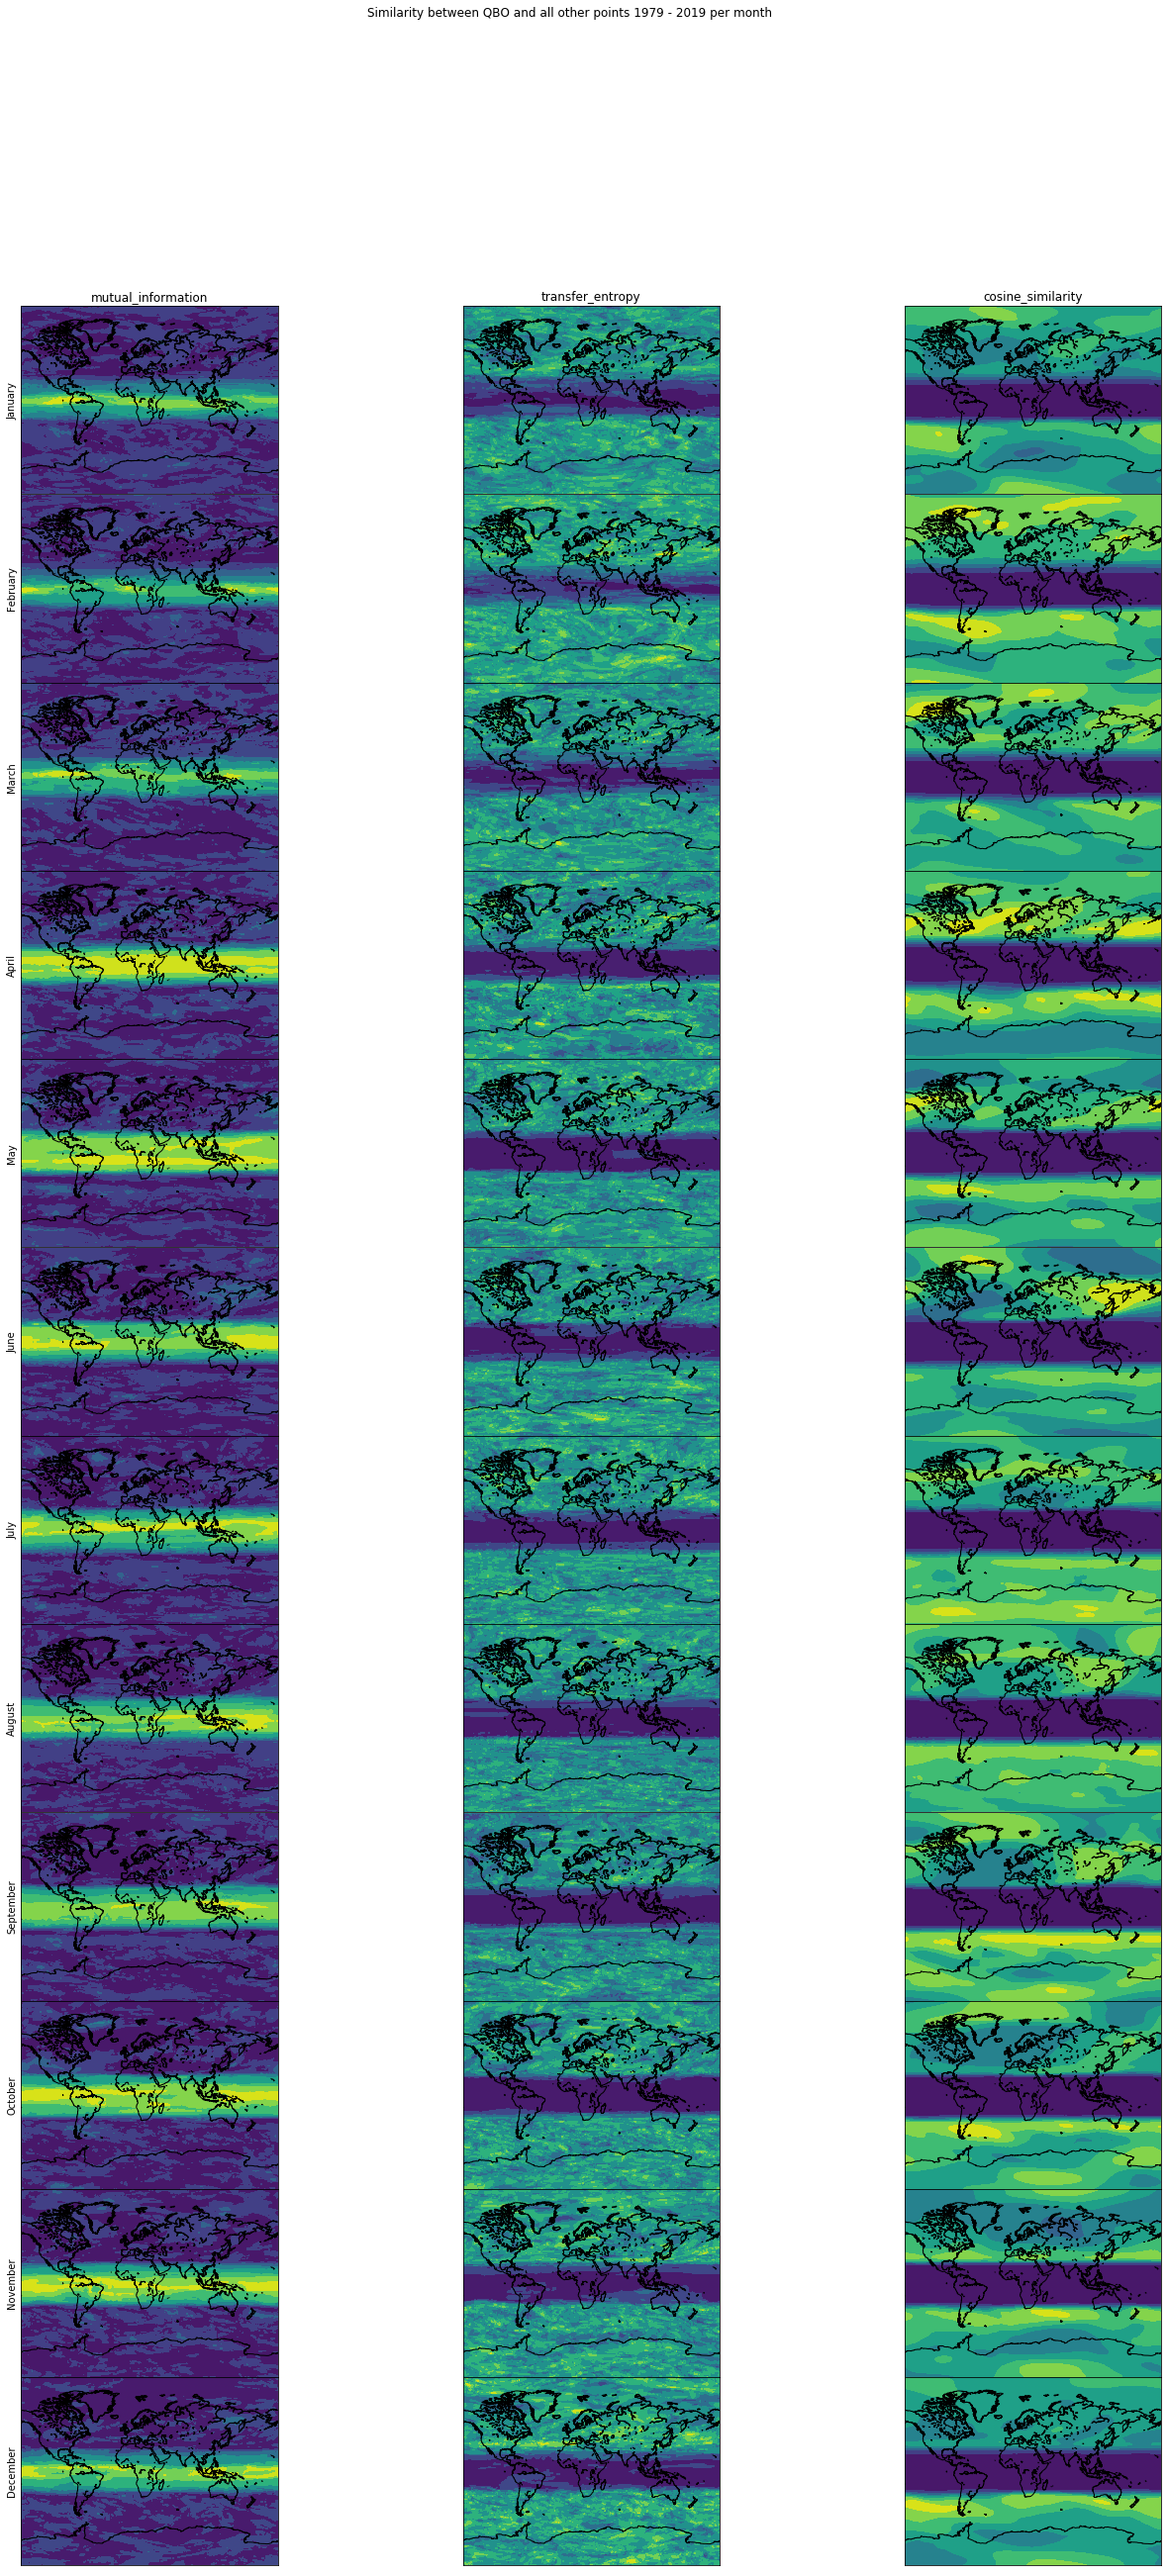

In [7]:
plots.plot_similarities(np.array(u_l30[:, :, :, :]), np.array(qbo_equator), metrics, mode="whole_period_per_month")

<h2>3. Visualization: Whole period, but only winter months</h2>

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:157: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[i])


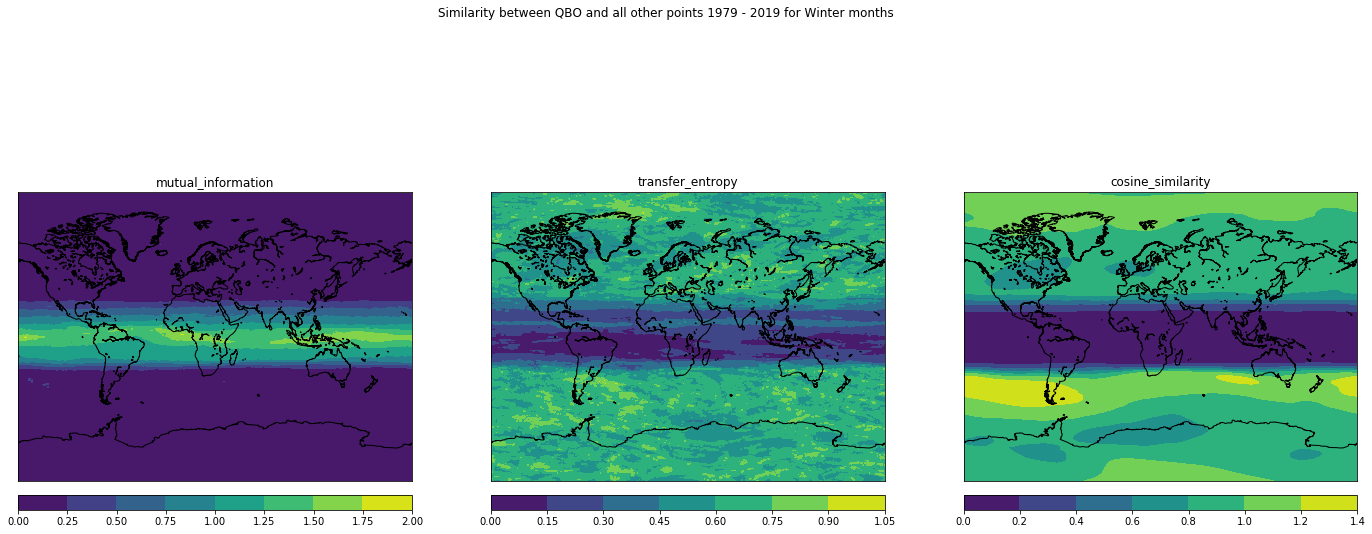

In [8]:
plots.plot_similarities(np.array(u_l30[:, :, :, :]), np.array(qbo_equator), metrics, mode="whole_period_winter_only")